In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

quarter           0
house_type        0
sales_type        0
year_build        0
purchase_price    0
no_rooms          0
sqm               0
sqm_price         0
city              3
region            0
dtype: int64
quarter           0
house_type        0
sales_type        0
year_build        0
purchase_price    0
no_rooms          0
sqm               0
sqm_price         0
city              0
region            0
dtype: int64
5
602
  house_type    sales_type  year_build  purchase_price  no_rooms    sqm  \
0      Villa  regular_sale        1997         6500000         5  142.0   
1  Apartment  regular_sale        1885         3400000         2   46.0   
2      Villa  regular_sale        1949         4550000         4  112.0   
3      Villa  regular_sale        2001         1630000         4  186.0   
4  Apartment  regular_sale        1965         1975000         3   82.0   

   sqm_price   region  year  quarter_num  
0  45774.650  Zealand  2024            4  
1  73913.050  Zealand  2024    

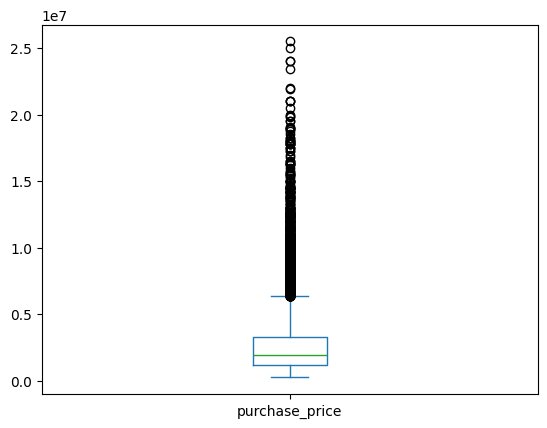

(27746, 17)
(27746,)
(22196, 17)
(5550, 17)


In [4]:

df = pd.read_csv("DKHousingPricesSample100k.csv",encoding="latin1")

cols_to_drop = ["zip_code","address","house_id","date","%_change_between_offer_and_purchase","nom_interest_rate%","area","dk_ann_infl_rate%","yield_on_mortgage_credit_bonds%"]

df.drop(columns=cols_to_drop, inplace=True)

print(df.isna().sum()) # Missing value

df.dropna(subset=["city"], inplace=True) # remove record

print(df.isna().sum()) # check

df["year"] = df["quarter"].str[:4].astype(int)
df["quarter_num"] = df["quarter"].str[-1].astype(int)

df.drop(columns=["quarter"], inplace=True) # delete

# compare
print(df["region"].nunique())
print(df["city"].nunique())

df.drop(columns=["city"], inplace=True)

print(df.head())

df.to_excel("housing_clean.xlsx", index=False)

catag_cols = ["house_type","region","sales_type"]

df_encoded = pd.get_dummies(
    df,
    columns = catag_cols,
    drop_first = True
)

print(df_encoded.head())
print(df_encoded.tail())

df_encoded["purchase_price"].plot.box()
plt.show()

df_encoded.to_excel("housing_clean_final3.xlsx", index=False)

# Target
Y = df_encoded["purchase_price"]

# Features
X = df_encoded.drop(columns=["purchase_price"])

print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # train on main & std to train
X_test_scaled = scaler.transform(X_test) # same mean and std

